## 单品销量环比增长情况分析

下面分析京东电商京东电商《0基础Python（全彩版）》一书2019年销量环比增长情况

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
df=pd.read_excel('JD2019.xlsx')

In [3]:
#数据处理
df1=df[df['商品名称']=='零基础学Python（全彩版）'].sort_values('日期')
df1=df1[['北京','上海','广州','成都','武汉','沈阳','西安','日期']]
df1= df1.set_index('日期')          #将日期设置为索引
df1['全国销量']=df1.sum(axis=1)     #求和运算

In [4]:
#环比增长率
df1['rate']=((df1['全国销量']-df1['全国销量'].shift())/df1['全国销量'])*100

In [5]:
#选取2019年数据
df1=df1['2019-01-01':'2019-12-01']
print(df1)

              北京    上海    广州   成都   武汉   沈阳   西安    全国销量       rate
日期                                                                 
2019-01-01   493   412   273  130  143   98  121  1670.0  20.838323
2019-02-01   364   356   267  112  124   62   66  1351.0 -23.612139
2019-03-01   601   453   382  173  164  102   94  1969.0  31.386491
2019-04-01   430   334   285  151  167   90   84  1541.0 -27.774173
2019-05-01   334   291   275  123  161   64   70  1318.0 -16.919575
2019-06-01   545   597   512  213  244  115  116  2342.0  43.723313
2019-07-01   644   613   517  293  481  127  116  2791.0  16.087424
2019-08-01   458   457   358  187  192   90   93  1835.0 -52.098093
2019-09-01  1144   915   818  338  495  213  232  4155.0  55.836342
2019-10-01   673   455   415  194  191  126  131  2185.0 -90.160183
2019-11-01  2229  1601  1367  592  650  395  407  7241.0  69.824610
2019-12-01  1640  1270  1045  518  548  288  307  5616.0 -28.935185


In [6]:
df1.to_excel('aa.xlsx')

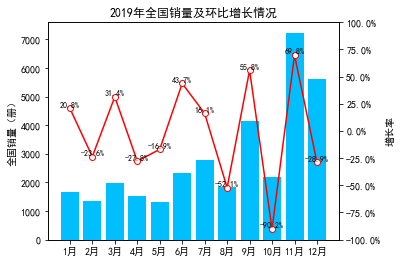

In [7]:
x=[0,1,2,3,4,5,6,7,8,9,10,11]
y1=df1['全国销量']
y2=df1['rate']
fig = plt.figure()
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文乱码
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号
ax1 = fig.add_subplot(111)                  #添加子图
plt.title('2019年全国销量及环比增长情况')   #图表标题
#图表x轴标题
plt.xticks(x,['1月','2月','3月','4月','5月','6月','7月','8月','9月','10月','11月','12月'])
ax1.bar(x,y1,color = 'deepskyblue',label='left')
ax1.set_ylabel('全国销量（册）')            #y轴标签
ax2 = ax1.twinx()                           #添加一条y轴坐标轴
ax2.plot(x,y2,color='r',linestyle='-',marker='o',mfc='w',label=u"增长率")
# 设置右侧y轴格式
fmt = '%.1f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax2.yaxis.set_major_formatter(yticks)
ax2.set_ylim(-100,100)
ax2.set_ylabel(u"增长率")
for a,b in zip(x,y2):
    plt.text(a, b+0.02, '%.1f%%' % b, ha='center', va= 'bottom',fontsize=8)
#调整图表距右的空白
plt.subplots_adjust(right=0.8)
plt.show()

2月比1月下降了23.6个百分点；